<a href="https://colab.research.google.com/github/Deleon57/EDAR-Data/blob/main/KNN(FSR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
from google.colab import files
import yfinance as yf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np


# Importing the FSR Data from the in build ynfinace library

In [90]:
stocklist = ['FSR']
stocks = [i + '.JO' for i in stocklist]
start = "2013-03-01"
end = "2024-02-28"

df = yf.download(['FSR.JO'], start=start, end=end)
df.head()

/tmp/ipython-input-2887939291.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['FSR.JO'], start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,FSR.JO,FSR.JO,FSR.JO,FSR.JO,FSR.JO
Date,,,,,
2013-03-01,3121.473633,3132.408732,3062.821740,3084.691937,12379894
2013-03-04,3064.810303,3126.444503,3032.005003,3126.444503,14174847
2013-03-05,3201.001953,3201.001953,3083.698155,3100.597855,16391688
2013-03-06,3107.556396,3220.883789,3105.568197,3202.989990,18189945
2013-03-07,3114.515137,3156.267335,3095.627238,3132.408936,18272095


# This code first shows a summary of the dataset (columns, types, and data count) and then shows how many missing values are in each column.

In [91]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2797 entries, 2013-03-01 to 2024-02-27
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, FSR.JO)   2797 non-null   float64
 1   (High, FSR.JO)    2797 non-null   float64
 2   (Low, FSR.JO)     2797 non-null   float64
 3   (Open, FSR.JO)    2797 non-null   float64
 4   (Volume, FSR.JO)  2797 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 131.1 KB


None

,,0
Price,Ticker,
Close,FSR.JO,0
High,FSR.JO,0
Low,FSR.JO,0
Open,FSR.JO,0
Volume,FSR.JO,0


# This code calculates the daily return, creates new columns with past (lagged) values for close, volume, high, and low prices, removes any rows with missing data, and then shows the first few rows.

In [92]:
df['Daily Return'] = df['Close'].pct_change()

for i in range(1, lag + 1):
    df[f'Close_Lag{i}'] = df['Close'].shift(i)
    df[f'Volume_Lag{i}'] = df['Volume'].shift(i)
    df[f'High_Lag{i}'] = df['High'].shift(i)
    df[f'Low_Lag{i}'] = df['Low'].shift(i)

df.dropna(inplace=True)
display(df.head())

Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,FSR.JO,FSR.JO,FSR.JO,FSR.JO,FSR.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-08,3126.445068,3169.191376,3111.533566,3118.492267,13592761,0.003830,3114.515137,18272095.0,3156.267335,3095.627238,...,3201.001953,3083.698155,3064.810303,14174847.0,3126.444503,3032.005003,3121.473633,12379894.0,3132.408732,3062.821740
2013-03-11,3115.509521,3166.208623,3087.674720,3149.308923,15200192,-0.003498,3126.445068,13592761.0,3169.191376,3111.533566,...,3220.883789,3105.568197,3201.001953,16391688.0,3201.001953,3083.698155,3064.810303,14174847.0,3126.444503,3032.005003
2013-03-12,3067.792480,3125.450278,3048.904581,3120.479778,10159800,-0.015316,3115.509521,15200192.0,3166.208623,3087.674720,...,3156.267335,3095.627238,3107.556396,18189945.0,3220.883789,3105.568197,3201.001953,16391688.0,3201.001953,3083.698155
2013-03-13,3004.169922,3093.638914,3004.169922,3085.686114,11952003,-0.020739,3067.792480,10159800.0,3125.450278,3048.904581,...,3169.191376,3111.533566,3114.515137,18272095.0,3156.267335,3095.627238,3107.556396,18189945.0,3220.883789,3105.568197
2013-03-14,3039.958008,3062.822309,3002.182205,3022.064207,10393807,0.011913,3004.169922,11952003.0,3093.638914,3004.169922,...,3166.208623,3087.674720,3126.445068,13592761.0,3169.191376,3111.533566,3114.515137,18272095.0,3156.267335,3095.627238


# This code downloads First Rand stock data from Yahoo Finance for 2013-03-01 to 2024-02-28, calculates daily returns, and then creates five lag columns for close, volume, high, and low prices to use past data as features.

In [93]:
start = "2013-03-01"
end = "2024-02-28"
df = yf.download(['FSR.JO'], start=start, end=end)

df['Daily Return'] = df['Close'].pct_change()

lag = 5
for i in range(1, lag + 1):
    df[f'Close_Lag{i}'] = df['Close'].shift(i)
    df[f'Volume_Lag{i}'] = df['Volume'].shift(i)
    df[f'High_Lag{i}'] = df['High'].shift(i)
    df[f'Low_Lag{i}'] = df['Low'].shift(i)

df.dropna(inplace=True)
display(df.head())

/tmp/ipython-input-2043033221.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['FSR.JO'], start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,FSR.JO,FSR.JO,FSR.JO,FSR.JO,FSR.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-08,3126.445068,3169.191376,3111.533566,3118.492267,13592761,0.003830,3114.515137,18272095.0,3156.267335,3095.627238,...,3201.001953,3083.698155,3064.810303,14174847.0,3126.444503,3032.005003,3121.473633,12379894.0,3132.408732,3062.821740
2013-03-11,3115.509521,3166.208623,3087.674720,3149.308923,15200192,-0.003498,3126.445068,13592761.0,3169.191376,3111.533566,...,3220.883789,3105.568197,3201.001953,16391688.0,3201.001953,3083.698155,3064.810303,14174847.0,3126.444503,3032.005003
2013-03-12,3067.792480,3125.450278,3048.904581,3120.479778,10159800,-0.015316,3115.509521,15200192.0,3166.208623,3087.674720,...,3156.267335,3095.627238,3107.556396,18189945.0,3220.883789,3105.568197,3201.001953,16391688.0,3201.001953,3083.698155
2013-03-13,3004.169922,3093.638914,3004.169922,3085.686114,11952003,-0.020739,3067.792480,10159800.0,3125.450278,3048.904581,...,3169.191376,3111.533566,3114.515137,18272095.0,3156.267335,3095.627238,3107.556396,18189945.0,3220.883789,3105.568197
2013-03-14,3039.958008,3062.822309,3002.182205,3022.064207,10393807,0.011913,3004.169922,11952003.0,3093.638914,3004.169922,...,3166.208623,3087.674720,3126.445068,13592761.0,3169.191376,3111.533566,3114.515137,18272095.0,3156.267335,3095.627238


# This code makes a new column called Target that is 1 if the daily return is positive and 0 if it’s negative or zero, then shows the first few rows.

In [94]:
df['Target'] = (df['Daily Return'] > 0).astype(int)
display(df.head())

Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5,Target
Ticker,FSR.JO,FSR.JO,FSR.JO,FSR.JO,FSR.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-08,3126.445068,3169.191376,3111.533566,3118.492267,13592761,0.003830,3114.515137,18272095.0,3156.267335,3095.627238,...,3083.698155,3064.810303,14174847.0,3126.444503,3032.005003,3121.473633,12379894.0,3132.408732,3062.821740,1
2013-03-11,3115.509521,3166.208623,3087.674720,3149.308923,15200192,-0.003498,3126.445068,13592761.0,3169.191376,3111.533566,...,3105.568197,3201.001953,16391688.0,3201.001953,3083.698155,3064.810303,14174847.0,3126.444503,3032.005003,0
2013-03-12,3067.792480,3125.450278,3048.904581,3120.479778,10159800,-0.015316,3115.509521,15200192.0,3166.208623,3087.674720,...,3095.627238,3107.556396,18189945.0,3220.883789,3105.568197,3201.001953,16391688.0,3201.001953,3083.698155,0
2013-03-13,3004.169922,3093.638914,3004.169922,3085.686114,11952003,-0.020739,3067.792480,10159800.0,3125.450278,3048.904581,...,3111.533566,3114.515137,18272095.0,3156.267335,3095.627238,3107.556396,18189945.0,3220.883789,3105.568197,0
2013-03-14,3039.958008,3062.822309,3002.182205,3022.064207,10393807,0.011913,3004.169922,11952003.0,3093.638914,3004.169922,...,3087.674720,3126.445068,13592761.0,3169.191376,3111.533566,3114.515137,18272095.0,3156.267335,3095.627238,1


# This code separates the features (X) from the target (y), then splits the data into training (80%) and testing (20%) sets. It then shows the first few rows of each split to check the data.

In [95]:
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,FSR.JO,FSR.JO,FSR.JO,FSR.JO,FSR.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-31,6410.059082,6617.381783,6289.453088,6429.993957,12796135,-0.004026,6435.972656,10265280.0,6548.604670,6288.454621,...,6362.214813,6149.908412,6363.212402,19384728.0,6364.209146,5906.703743,6065.185059,16861940.0,6156.885474,5948.566053
2022-08-26,6882.679199,6942.571984,6758.900777,6737.938302,10218681,0.010108,6813.803223,8560258.0,6861.717456,6774.872908,...,6870.700483,6722.964950,6789.845215,9364106.0,6827.777311,6572.234768,6772.876465,9607033.0,7043.392238,6732.947937
2014-02-05,3024.299805,3063.085629,3015.349230,3043.195463,24087304,-0.004583,3038.222656,30918313.0,3092.920609,2978.552162,...,3138.668526,3063.085887,3084.965332,64853261.0,3163.531503,3013.360721,3182.426758,30064379.0,3332.597520,3096.899039
2021-01-08,5218.215820,5272.083848,5037.658171,5037.658171,14191731,0.038309,5025.687988,9342937.0,5046.636668,4866.079001,...,4976.807166,4708.464586,4937.901855,10363894.0,5172.327499,4847.124266,5091.525879,4413511.0,5183.301032,5089.530767
2019-11-19,6835.767578,6848.731105,6699.151946,6699.151946,10177423,0.017666,6717.101074,6676709.0,6843.744755,6640.317110,...,6793.885257,6667.241572,6734.053711,12712049.0,6839.756316,6697.157519,6868.675293,7733858.0,6887.621987,6760.978294


Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,FSR.JO,FSR.JO,FSR.JO,FSR.JO,FSR.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,7295.356445,7333.311476,7161.515021,7259.399048,9529954,0.010934,7216.450195,11465098.0,7302.348426,7183.489246,...,7171.502864,7066.627126,7080.610840,9707622.0,7099.588355,6922.797818,7070.623047,18851756.0,7255.404127,7051.645531
2017-10-09,5224.780762,5270.612172,5199.872387,5259.652487,7408703,-0.002093,5235.740234,9141074.0,5288.545987,5207.842855,...,5157.029980,5086.290195,5205.491211,10856389.0,5232.385253,5147.718825,5178.598145,7162724.0,5224.417632,5151.704098
2023-09-21,6478.324219,6596.184573,6397.420077,6620.156171,40580663,-0.028315,6667.101074,32349885.0,6667.101074,6476.327096,...,6732.024063,6595.186185,6680.085938,34270655.0,6901.823240,6647.124987,6871.858398,24095096.0,7145.534154,6779.967269
2013-09-23,3390.476562,3419.310527,3381.528091,3416.327703,9242258,-0.008721,3420.303955,18680163.0,3430.246699,3362.636040,...,3368.602099,3281.105941,3350.705566,9987174.0,3350.705566,3281.106341,3291.048828,16107622.0,3358.659499,3281.106082
2013-12-30,3522.548828,3522.548828,3456.911272,3461.883814,7328684,0.019574,3454.922119,4882674.0,3460.889169,3372.377923,...,3385.306641,3385.306641,3385.306641,592995.0,3411.163859,3342.542779,3367.405273,3421015.0,3400.224049,3328.619448


,Target
Date,
2018-10-31,0
2022-08-26,1
2014-02-05,0
2021-01-08,1
2019-11-19,1


,Target
Date,
2023-08-10,1
2017-10-09,0
2023-09-21,0
2013-09-23,0
2013-12-30,1


# This code scales the feature values so they’re on the same range, using only the training data to fit the scaler. It then applies the same scaling to the test data and converts both back into DataFrames for easier viewing.

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

display(X_train.head())
display(X_test.head())

Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,FSR.JO,FSR.JO,FSR.JO,FSR.JO,FSR.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-31,0.904583,1.013493,0.873889,0.927590,0.033472,-0.229473,0.927865,-0.280903,0.955890,0.875546,...,0.801945,0.758519,0.868808,0.768048,0.803117,0.549941,0.616626,0.480318,0.629655,0.586136
2022-08-26,1.305491,1.286733,1.276635,1.189540,-0.285941,0.506338,1.248482,-0.482801,1.218984,1.293037,...,1.228873,1.250232,1.230282,-0.392120,1.191653,1.119895,1.215455,-0.373790,1.372020,1.257348
2014-02-05,-1.967439,-1.972997,-1.935014,-1.953363,1.432737,-0.258427,-1.955376,2.164696,-1.947768,-1.965328,...,-1.904570,-1.890133,-1.908762,6.032310,-1.879505,-1.927886,-1.822687,2.034618,-1.735418,-1.854097
2021-01-08,-0.106416,-0.116891,-0.200045,-0.256789,0.206422,1.974374,-0.268866,-0.390121,-0.306147,-0.345272,...,-0.361254,-0.478314,-0.338819,-0.276367,-0.195849,-0.357471,-0.207258,-0.985214,-0.185630,-0.148959
2019-11-19,1.265697,1.207884,1.225376,1.156547,-0.291054,0.899787,1.166423,-0.705838,1.203883,1.177548,...,1.164378,1.202418,1.183011,-0.004502,1.201694,1.226877,1.296518,-0.594315,1.241577,1.281334


Price,Close,High,Low,Open,Volume,Daily Return,Close_Lag1,Volume_Lag1,High_Lag1,Low_Lag1,...,High_Lag3,Low_Lag3,Close_Lag4,Volume_Lag4,High_Lag4,Low_Lag4,Close_Lag5,Volume_Lag5,High_Lag5,Low_Lag5
Ticker,FSR.JO,FSR.JO,FSR.JO,FSR.JO,FSR.JO,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-10,1.655551,1.615051,1.622044,1.633117,-0.371292,0.549333,1.590157,-0.138828,1.589227,1.643750,...,1.481429,1.545111,1.476640,-0.352349,1.419470,1.420113,1.467400,0.714576,1.549560,1.530065
2017-10-09,-0.100847,-0.118127,-0.060879,-0.067951,-0.634169,-0.128838,-0.090621,-0.414024,-0.102882,-0.051938,...,-0.209938,-0.154120,-0.112098,-0.219347,-0.145512,-0.100045,-0.133580,-0.661554,-0.151199,-0.095756
2023-09-21,0.962490,0.995682,0.966515,1.089350,3.476687,-1.493855,1.123994,2.334213,1.055457,1.036796,...,1.112439,1.140591,1.137286,2.491513,1.253714,1.184030,1.299211,1.331865,1.457554,1.297584
2013-09-23,-1.656824,-1.673680,-1.620863,-1.635961,-0.406945,-0.473846,-1.631152,0.715533,-1.664328,-1.635670,...,-1.711516,-1.703061,-1.683607,-0.319983,-1.722627,-1.698592,-1.730774,0.391513,-1.713594,-1.696467
2013-12-30,-1.544792,-1.586934,-1.556191,-1.597209,-0.644086,0.999096,-1.601776,-0.918277,-1.638581,-1.627309,...,-1.697491,-1.613651,-1.654291,-1.407623,-1.671954,-1.645978,-1.666163,-1.102059,-1.678788,-1.655809


# This code creates a K-Nearest Neighbours model that looks at the 20 closest data points to make predictions, then trains it using the training data.

# Determine the best value for K

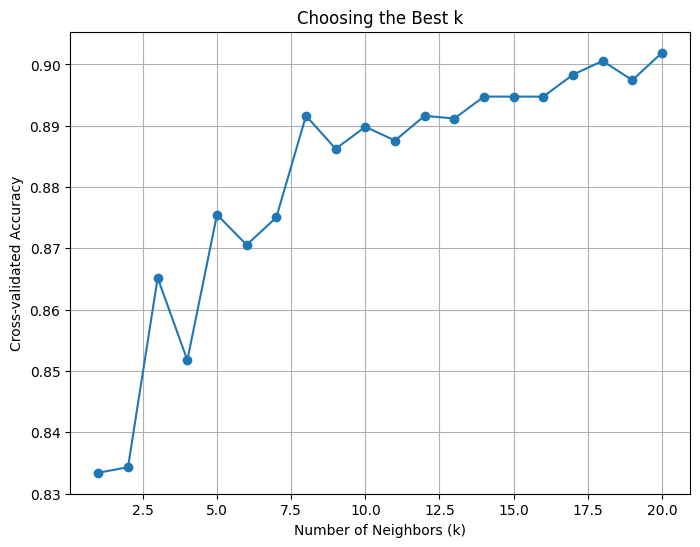

Best k: 20, Accuracy: 0.9019


In [97]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

plt.figure(figsize=(8,6))
plt.plot(k_values, cv_scores, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-validated Accuracy")
plt.title("Choosing the Best k")
plt.grid(True)
plt.show()

best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Best k: {best_k}, Accuracy: {max(cv_scores):.4f}")

# This code creates a K-Nearest Neighbours model that looks at the 20 closest data points to make predictions, then trains it using the training data.

In [98]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

# This code uses the trained model to predict on the test data, calculates the accuracy score, and prints a detailed classification report. It also creates and displays a confusion matrix to show how well the model classified each class.

Accuracy: 0.9231

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       266
           1       0.96      0.89      0.92       293

    accuracy                           0.92       559
   macro avg       0.92      0.92      0.92       559
weighted avg       0.93      0.92      0.92       559



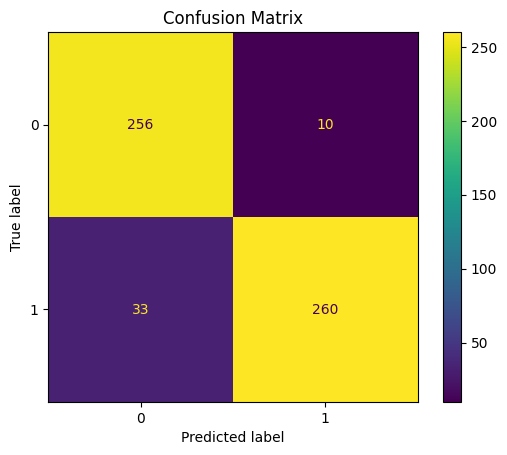

In [99]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Trade-off between detecting “ups” (true positives) vs falsely predicting ups when it was a down day.

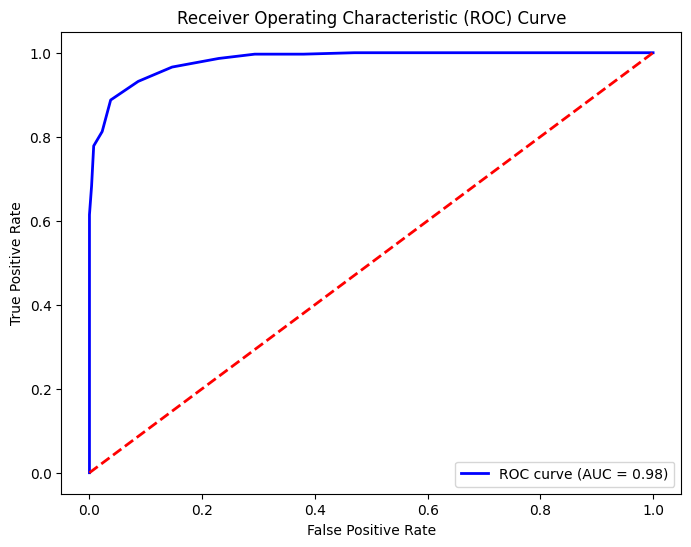

In [100]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Learning Curve

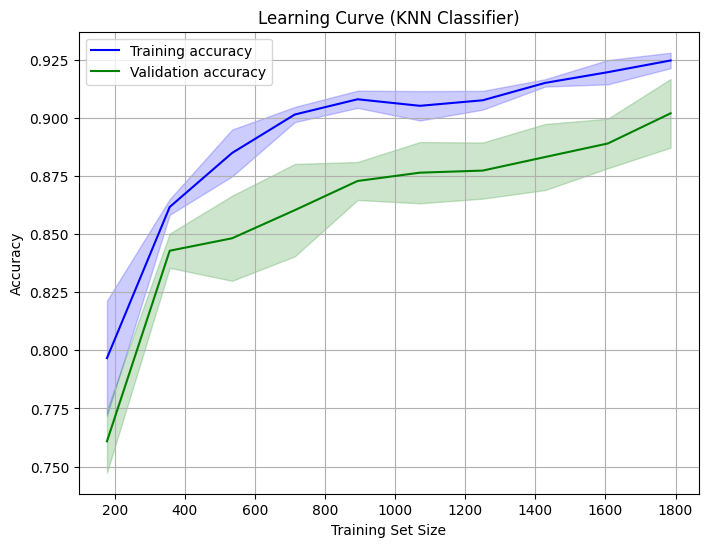

In [101]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training accuracy", color="blue")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_mean, label="Validation accuracy", color="green")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2, color="green")

plt.title("Learning Curve (KNN Classifier)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# PR Curve

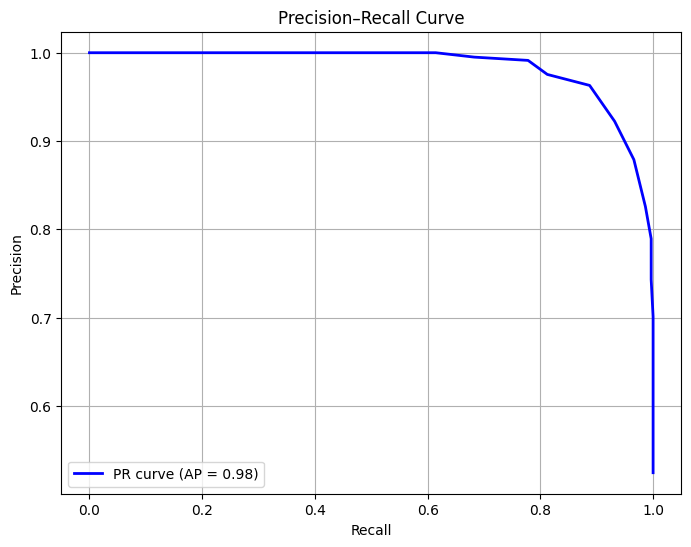

In [102]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_prob = knn.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color="blue", lw=2, label=f"PR curve (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()

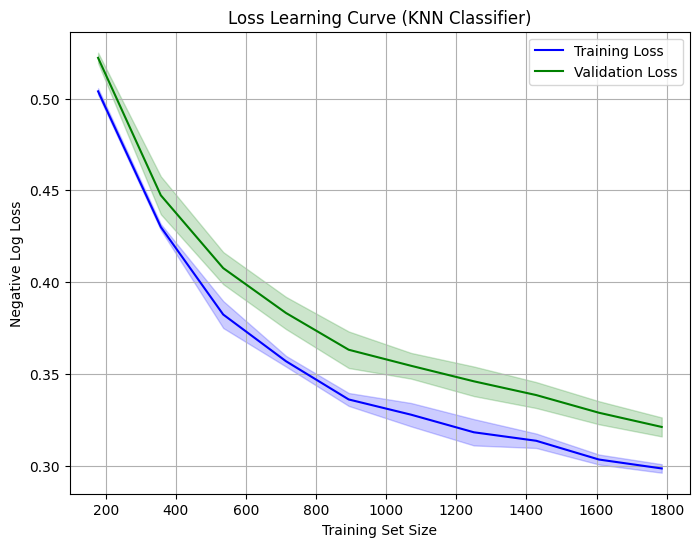

In [104]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss

train_sizes_loss, train_scores_loss, test_scores_scores = learning_curve(
    estimator=knn,
    X=X_train,
    y=y_train,
    cv=5,
    scoring="neg_log_loss",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

train_loss_mean = -np.mean(train_scores_loss, axis=1)
train_loss_std = np.std(train_scores_loss, axis=1)
test_loss_mean = -np.mean(test_scores_scores, axis=1)
test_loss_std = np.std(test_scores_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_loss, train_loss_mean, label="Training Loss", color="blue")
plt.fill_between(train_sizes_loss, train_loss_mean - train_loss_std, train_loss_mean + train_loss_std, alpha=0.2, color="blue")
plt.plot(train_sizes_loss, test_loss_mean, label="Validation Loss", color="green")
plt.fill_between(train_sizes_loss, test_loss_mean - test_loss_std, test_loss_mean + test_loss_std, alpha=0.2, color="green")

plt.title("Loss Learning Curve (KNN Classifier)")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Log Loss")
plt.legend(loc="best")
plt.grid(True)
plt.show()